### Data and code for Chiacchierini et al (2022). Restriction of dietary protein in rats increases progressive-ratio motivation for protein.

This notebook contains code that will download data from a repository and extract parameters into pandas dataframes. Figures from the paper are also recreated using matplotlib.

The raw datafiles are Med Associates files in the stripped format. Timestamps of individual lever presses and reward deliveries are included in the raw datafiles and can be extracted but are not used here.

In [1]:
import numpy as np
import trompy as tp
import pandas as pd

import matplotlib.pyplot as plt

from lifelines import KaplanMeierFitter

%matplotlib inline

#### Downloading data

In [23]:
tp.download_data(url = "https://zenodo.org/record/5409201/files/PRPR_data.zip?download=1")

C:\Github\PRPR
downloading data...
...100%, 1 MB, 3260 KB/s, 0 seconds elapsedunzipping data...
Datafiles ready


#### Extraction of data for experiment 1 (grain pellets)
Data are stored in pandas dataframe, *df_grain*

In [24]:
rows, header = tp.metafilereader(".\\data\\PRPR_metafiles.xls", sheetname='metafile_exp1')

filestub = ".//data//PRPR_exp1//"

columns = ["rat", "diet", "ratio", "day", "pellet", "responses", "rewards", "breakpoint", "stopped"]
df = pd.DataFrame(columns=columns)

FR_sessions = ["FR1", "FR2", "FR5", "PR3"]

for row in rows:
    if row[6] in FR_sessions:
        try:
            temp = [row[1], row[4], row[6], row[2], row[7]]
            resps, rewards, stop, breakp = tp.medfilereader(filestub + row[0], varsToExtract=["a", "c", "t", "x"])
            temp.append(resps[0])
            temp.append(rewards[0])
            if resps[0] != row[8]:
                print("For {} day {}, {} does not equal {}".format(row[1], row[2], resps[0], row[8]))
            if rewards[0] != row[9]:
                print("For {} day {}, {} does not equal {}".format(row[1], row[2], rewards[0], row[9]))

            temp.append(breakp[0])
            temp.append(stop[0])

            df.loc[df.shape[0]] = temp
        except FileNotFoundError:
            print(row[0], "cannot be found. Check", row[1], row[2])

df = df[df.rat != "PPR2.4"]
df_grain = df


File is excel file. Making csv metafile first


In [4]:
rows, header = tp.metafilereader(".\\data\\PRPR_metafiles.xls", sheetname='freeaccess_exp1')

df = pd.DataFrame(columns=["rat", "diet", "d1", "d2", "mean"])

for row in rows:
    temp = [row[0], row[1], row[2], row[3], np.mean([row[2], row[3]])]
    df.loc[df.shape[0]] = temp
    
df = df[df.rat != "PPR2.4"]
df_grain_freeaccess = df

File is excel file. Making csv metafile first


#### Extraction of data for experiment 2 (protein pellets)
Data are stored in pandas dataframe, *df_protein*

In [5]:
rows, header = tp.metafilereader(".\\data\\PRPR_metafiles.xls", sheetname='metafile_exp2')

filestub = ".//data//PRPR_exp2//"

columns = ["rat", "diet", "ratio", "day", "pellet", "responses", "rewards", "breakpoint", "stopped"]
df = pd.DataFrame(columns=columns)

FR_sessions = ["FR1", "FR2", "FR5", "PR3", "PR3-rep"]

for row in rows:
    if row[6] in FR_sessions:
        try:
            temp = [row[1], row[4], row[6], row[2], row[7]]
            resps, rewards, stop, breakp = tp.medfilereader(filestub + row[0], varsToExtract=["a", "c", "t", "x"])
            temp.append(resps[0])
            temp.append(rewards[0])
            if resps[0] != row[8]:
                print("For {} day {}, {} does not equal {}".format(row[1], row[2], resps, row[8]))
            if rewards[0] != row[9]:
                print("For {} day {}, {} does not equal {}".format(row[1], row[2], rewards, row[9]))

            temp.append(breakp[0])
            temp.append(stop[0])

            df.loc[df.shape[0]] = temp
            
        except FileNotFoundError:
            print(row[0], "cannot be found. Check", row[1], row[2])
            temp = [row[1], row[4], row[6], row[2], row[7], row[8], row[9], 0, 0]
            df.loc[df.shape[0]] = temp
                       
df = df[df.rat != "cPPR1.9"]      
df_protein = df

File is excel file. Making csv metafile first


In [6]:
df_protein[df_protein["day"] == 15.0]

,rat,diet,ratio,day,pellet,responses,rewards,breakpoint,stopped
176,cPPR1.1,NR,FR5,15.0,protein,241.0,41.0,0.0,2700.796
177,cPPR1.2,NR,FR5,15.0,protein,263.0,44.0,0.0,2700.796
178,cPPR1.3,NR,FR5,15.0,protein,285.0,46.0,0.0,2700.796
179,cPPR1.4,NR,FR5,15.0,protein,150.0,28.0,0.0,2700.796
180,cPPR1.5,NR,FR5,15.0,protein,119.0,21.0,0.0,2700.796
181,cPPR1.6,NR,FR5,15.0,protein,179.0,35.0,0.0,2700.796
182,cPPR1.7,NR,FR5,15.0,protein,488.0,86.0,0.0,2700.796
183,cPPR1.8,NR,FR5,15.0,protein,269.0,50.0,0.0,2700.796
185,cPPR1.10,PR,FR5,15.0,protein,563.0,100.0,0.0,1324.450
186,cPPR1.11,PR,FR5,15.0,protein,528.0,74.0,0.0,2700.796


In [7]:
rows, header = tp.metafilereader(".\\data\\PRPR_metafiles.xls", sheetname='freeaccess_exp2')

df = pd.DataFrame(columns=["rat", "diet", "d1", "d2", "mean"])

for row in rows:
    temp = [row[0], row[1], row[2], row[3], np.mean([row[2], row[3]])]
    df.loc[df.shape[0]] = temp
    
df = df[df.rat != "cPPR1.9"]
df_protein_freeaccess = df

File is excel file. Making csv metafile first


#### Writes dataframes to an Excel sheet, *output.xlsx*

In [8]:
with pd.ExcelWriter('output.xlsx') as writer:
    df_grain.to_excel(writer, sheet_name='grain')
    df_grain_freeaccess.to_excel(writer, sheet_name='grain_freeaccess')
    df_protein.to_excel(writer, sheet_name='protein')
    df_protein_freeaccess.to_excel(writer, sheet_name='protein_freeaccess')

#### Function for making fixed ratio figures (1B and 2B)

In [9]:
def make_FR_figure(df, colors = ["grey", "red"]):

    df = df[df["ratio"] != "PR3"]

    df_subset = df[df["diet"] == "NR"]
    df_NR = df_subset.pivot(index="rat", columns="day")["responses"]
    
    df_subset = df[df["diet"] == "PR"]
    df_PR = df_subset.pivot(index="rat", columns="day")["responses"]

    NR_mean = list(df_NR.mean(axis=0))
    NR_sem = list(df_NR.sem(axis=0))
    
    PR_mean = list(df_PR.mean(axis=0))
    PR_sem = list(df_PR.sem(axis=0))

    FR1x = np.arange(1,6)
    FR2x = np.arange(6,11)
    FR5x = np.arange(11,16)

    f, ax = plt.subplots()

    ax.errorbar(FR1x, NR_mean[:5], yerr=NR_sem[:5], color=colors[0], label="NR")
    ax.errorbar(FR2x, NR_mean[5:10], yerr=NR_sem[5:10], color=colors[0])
    ax.errorbar(FR5x, NR_mean[10:15], yerr=NR_sem[10:15], color=colors[0])
    
    ax.errorbar(FR1x, PR_mean[:5], yerr=PR_sem[:5], color=colors[1], label="PR")
    ax.errorbar(FR2x, PR_mean[5:10], yerr=PR_sem[5:10], color=colors[1])
    ax.errorbar(FR5x, PR_mean[10:15], yerr=PR_sem[10:15], color=colors[1])

    ax.set_ylabel("Responses")
    ax.set_xticks([3, 9, 15])
    ax.set_xticklabels(["FR1", "FR2", "FR5"])

    ax.legend(loc="upper left")


In [10]:
# Function for making progressive ratio figures (1C,D and 2C, D)

def make_PR_figure(df, colors=["grey", "red"]):
    
    df = df[df["ratio"] == "PR3"]

    df_subset = df[df["diet"] == "NR"]
    df_NR = df_subset.pivot(index="rat", columns="day")["breakpoint"]

    df_subset = df[df["diet"] == "PR"]
    df_PR = df_subset.pivot(index="rat", columns="day")["breakpoint"]

    NRx = np.arange(1, 6)
    PRx = np.arange(7, 12)

    f, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, gridspec_kw={'width_ratios':[2,1]})

    ax1.bar(NRx, df_NR.mean(), color=colors[0], label="NR")
    ax1.bar(PRx, df_PR.mean(), color=colors[1], label="PR")

    for rat in df_NR.iterrows():
        ax1.plot(NRx, rat[1], color="xkcd:light grey")

    for rat in df_PR.iterrows():
        ax1.plot(PRx, rat[1], color="xkcd:light grey")

    ax1.set_ylabel("Breakpoint")
    ax1.set_xlabel("Session")
    ax1.set_xticks([1,2,3,4,5,7,8,9,10,11])
    ax1.set_xticklabels([str(x) for x in NRx]*2)
    ax1.legend()

    tp.barscatter([df_NR.mean(axis=1), df_PR.mean(axis=1)], spaced=True, barwidth=0.8,
                  barfacecoloroption="individual", barfacecolor=colors, 
                  barlabels=["NR", "PR"], ax=ax2)


In [11]:
# Functions for making duration survival graphs

def get_step_values(df):
    
    df_new = pd.DataFrame(df.mean(axis=1), columns=["mean"])
    df_new["min"] = df.min(axis=1)
    df_new["max"] = df.max(axis=1)

    df_sorted = df_new.sort_values("mean")

    x = [0] + list(df_sorted["mean"])
    y = [1] + list(np.linspace(1,0,len(x))[:-1])
    
    return x, y

def make_duration_figure(df, colors=["grey", "red"]):

    df = df[df["ratio"] == "PR3"]

    df_subset = df[df["diet"] == "NR"]
    df_NR = df_subset.pivot(index="rat", columns="day")["stopped"]

    df_subset = df[df["diet"] == "PR"]
    df_PR = df_subset.pivot(index="rat", columns="day")["stopped"]
    
    NRx, _ = get_step_values(df_NR)
    PRx, _ = get_step_values(df_PR)

    f, ax = plt.subplots()

    T = [x/60 for x in NRx[1:]]
    Q = [x/60 for x in PRx[1:]]

    kmf_T = KaplanMeierFitter()
    kmf_Q = KaplanMeierFitter()
    kmf_T.fit(T)
    kmf_T.plot(color=colors[0], ax=ax, label="NR")
    kmf_Q.fit(Q)
    kmf_Q.plot(color=colors[1], ax=ax, label="PR")
    
    ax.set_ylabel("Survival probability")
    ax.set_xlabel("Session duration")

In [12]:
# Function for making free acess intake graph

def make_freeaccess_figure(df, colors=["grey", "red"]):
    df_NR = df[df["diet"] == "NR"]["mean"]
    df_PR = df[df["diet"] == "PR"]["mean"]
    
    f, ax = plt.subplots(figsize=(1.5, 4))
    
    tp.barscatter([df_NR, df_PR],
                  barlabels=["NR", "PR"],
                  barfacecoloroption="individual",
                  barfacecolor=colors,
                  spaced=True,
                  ax=ax)
    
    ax.set_ylabel("Intake (g)")
    ax.set_yticks([0,1,2,3,4,5])

# Figures

#### Figure 1B

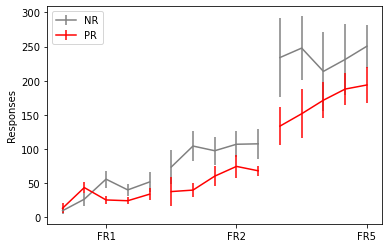

In [13]:
make_FR_figure(df_grain)

#### Figure 1C and 1D

C:\Users\jmc010\Miniconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


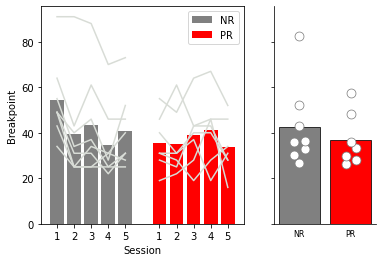

In [14]:
make_PR_figure(df_grain)

#### Figure 1E

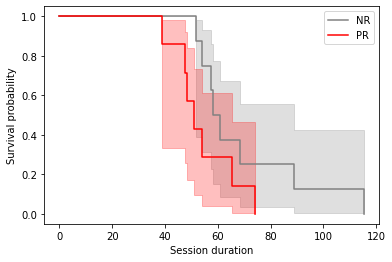

In [15]:
make_duration_figure(df_grain)

#### Figure 1F

C:\Users\jmc010\Miniconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


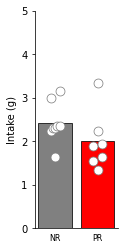

In [16]:
make_freeaccess_figure(df_grain_freeaccess)

#### Figure 2B

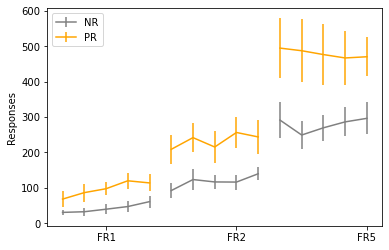

In [17]:
make_FR_figure(df_protein, colors=["grey", "orange"])

#### Figure 2C and 2D

C:\Users\jmc010\Miniconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


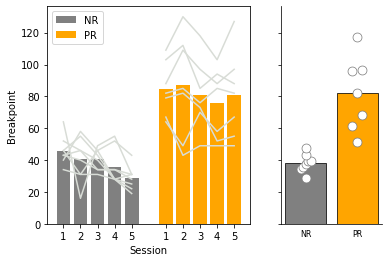

In [18]:
make_PR_figure(df_protein, colors=["grey", "orange"])

#### Figure 2E

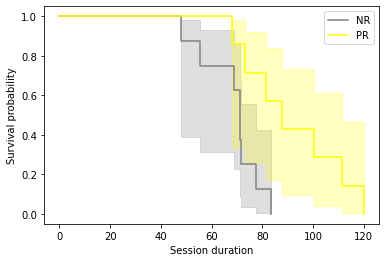

In [19]:
make_duration_figure(df_protein, colors=["grey", "yellow"])

#### Figure 2F

C:\Users\jmc010\Miniconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


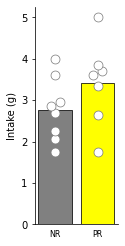

In [20]:
make_freeaccess_figure(df_protein_freeaccess, colors=["grey", "yellow"])

#### Figure 3

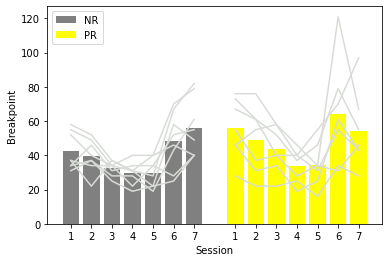

In [21]:
df = df_protein
colors = ["grey", "yellow"]

df = df[df["ratio"] == "PR3-rep"]
df_subset = df[df["diet"] == "NR"]
df_NR = df_subset.pivot(index="rat", columns="day")["breakpoint"]

df_subset = df[df["diet"] != "NR"]
df_PR = df_subset.pivot(index="rat", columns="day")["breakpoint"]

NRx = np.arange(1, 8)
PRx = np.arange(9, 16)

f, ax = plt.subplots()

ax.bar(NRx, df_NR.mean(), color=colors[0], label="NR")
ax.bar(PRx, df_PR.mean(), color=colors[1], label="PR")

for rat in df_NR.iterrows():
    ax.plot(NRx, rat[1], color="xkcd:light grey")

for rat in df_PR.iterrows():
    ax.plot(PRx, rat[1], color="xkcd:light grey")

ax.set_ylabel("Breakpoint")
ax.set_xlabel("Session")
ax.set_xticks([1,2,3,4,5,6,7,   9,10,11,12,13,14,15])
ax.set_xticklabels([str(x) for x in NRx]*2)
ax.legend()

#### Figure 4

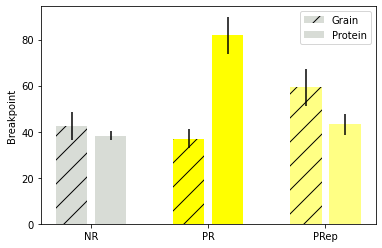

In [22]:
# gets data from grain pellet sessions
df = df_grain
df = df[df["ratio"] == "PR3"]

df_subset = df[df["diet"] == "NR"]
df_NR = df_subset.pivot(index="rat", columns="day")["breakpoint"]

df_subset = df[df["diet"] == "PR"]
df_PR = df_subset.pivot(index="rat", columns="day")["breakpoint"]

NR_grain = tp.mean_and_sem(df_NR.mean(axis=1))
PR_grain = tp.mean_and_sem(df_PR.mean(axis=1))

# gets data from protein pellet sessions
df = df_protein
df = df[df["ratio"] == "PR3"]

df_subset = df[df["diet"] == "NR"]
df_NR = df_subset.pivot(index="rat", columns="day")["breakpoint"]

df_subset = df[df["diet"] == "PR"]
df_PR = df_subset.pivot(index="rat", columns="day")["breakpoint"]

NR_protein = tp.mean_and_sem(df_NR.mean(axis=1))
PR_protein = tp.mean_and_sem(df_PR.mean(axis=1))

# gets data from repleted sessions
df = df_protein
df = df[df["ratio"] == "PR3-rep"]

df_subset = df[(df["diet"] == "PR-NR") & (df["pellet"] == "protein")]
df_PRep_prot = df_subset.pivot(index="rat", columns="day")["breakpoint"]

df_subset = df[(df["diet"] == "PR-NR") & (df["pellet"] == "grain")]
df_PRep_grain = df_subset.pivot(index="rat", columns="day")["breakpoint"]

PRep_protein = tp.mean_and_sem(df_PRep_prot.mean(axis=1))
PRep_grain = tp.mean_and_sem(df_PRep_grain.mean(axis=1))

# plots bar chart
f, ax = plt.subplots()
ax.bar(1, NR_grain[0], yerr=NR_grain[1], color="xkcd:light grey", hatch="/", label="Grain")
ax.bar(2, NR_protein[0], yerr=NR_protein[1], color="xkcd:light grey", label="Protein")

ax.bar(4, PR_grain[0], yerr=PR_grain[1], color="yellow", hatch="/")
ax.bar(5, PR_protein[0], yerr=PR_protein[1], color="yellow")

ax.bar(7, PRep_grain[0], yerr=PRep_grain[1], color="xkcd:pale yellow", hatch="/")
ax.bar(8, PRep_protein[0], yerr=PRep_protein[1], color="xkcd:pale yellow")

ax.set_ylabel("Breakpoint")
ax.set_xticks([1.5, 4.5, 7.5])
ax.set_xticklabels(["NR", "PR", "PRep"])
ax.legend()